Questions:- 

1) Import libraries and read the dataset.

2) Explore Data Analysis. Find out how one variable related to other and distributions of data.

3) State your insights.

4) Build a linear regression model to predict the house prices

5) Try to find out important features or create new features to improve the performance for your model.

6) Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

In [24]:
#Q1 - 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import csv
kc_house_df = pd.read_csv(r"C:\Users\Sairam\Desktop\AIML\RESIDENCY 5\Lab_External\kc_house_data.csv")

In [7]:
kc_house_df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [8]:
kc_house_df.shape

(21613, 21)

In [9]:
kc_house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
kc_house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [11]:
kc_house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
# Date and ID column are not considered as they don't add value to this analysis
kc_house_df.boxplot(['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'])

In [13]:
#g = sns.pairplot(kc_house_df, hue="price")

In [14]:
#kc_house_df.drop(['date','id'], axis =1)

In [15]:
#change the date parameter to just sold year
kc_house_df['date'] = kc_house_df['date'].astype('str')
kc_house_df['date']=kc_house_df.date.str[:4]
kc_house_df['date']=kc_house_df['date'].astype(int)

In [16]:
#We donot need certain features like zipcode, ID, so dropping these columns from the dataframe
columns_to_be_dropped = kc_house_df.columns[[0,16]]
kc_house_df.drop(columns_to_be_dropped,axis=1, inplace=True)

In [17]:
#Looking for any null values
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
date             21613 non-null int32
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int32(1), int64(13)
memory usage: 3.1 MB


In [18]:
#Let's do summary stats of the dataframe
kc_house_df.describe()

date         price      bedrooms     bathrooms   sqft_living  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2014.322954  5.400881e+05      3.370842      2.114757   2079.899736   
std        0.467616  3.671272e+05      0.930062      0.770163    918.440897   
min     2014.000000  7.500000e+04      0.000000      0.000000    290.000000   
25%     2014.000000  3.219500e+05      3.000000      1.750000   1427.000000   
50%     2014.000000  4.500000e+05      3.000000      2.250000   1910.000000   
75%     2015.000000  6.450000e+05      4.000000      2.500000   2550.000000   
max     2015.000000  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

# 2) Explore Data Analysis. Find out how one variable related to other and distributions of data.¶

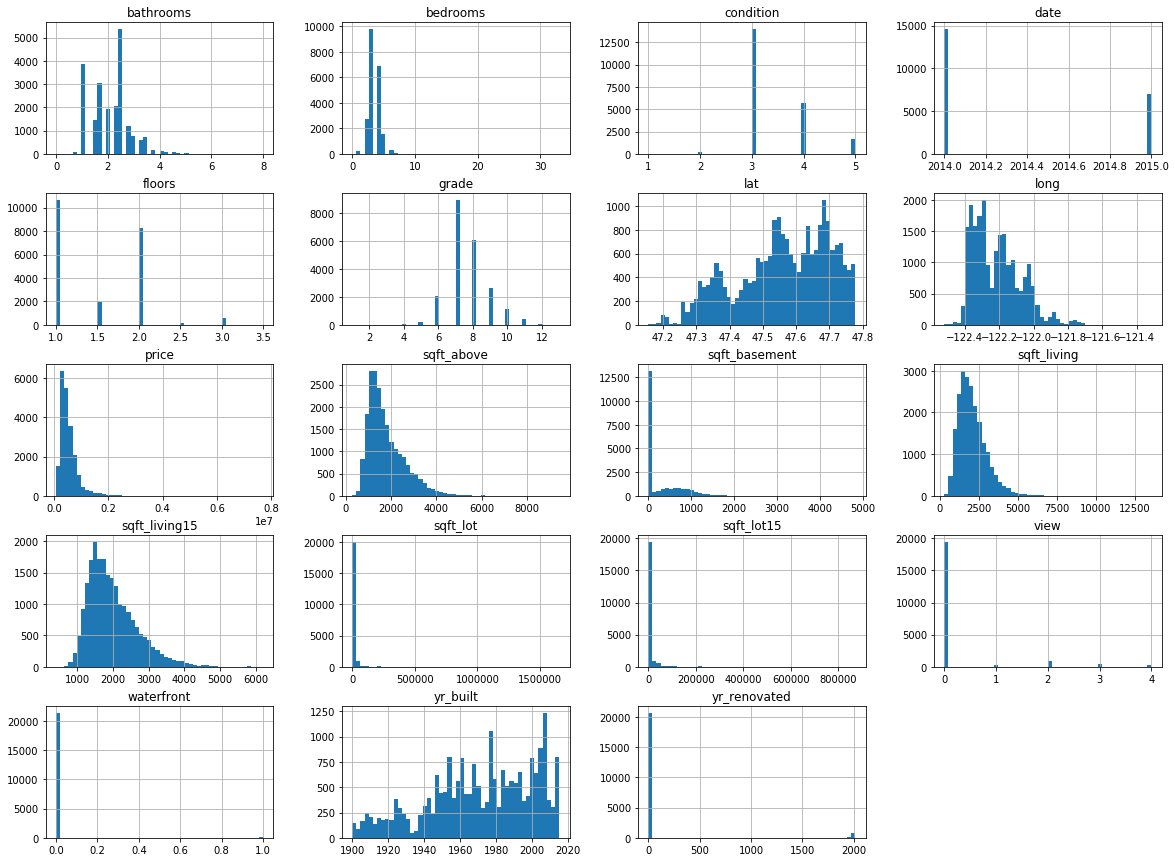

In [19]:
#Histogram plots for understanding the ditribution of each column in the dataframe
%matplotlib inline
import matplotlib.pyplot as plt
kc_house_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [20]:
#correlation of the dependent variable with other independent variables
corr_matrix = kc_house_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003576
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


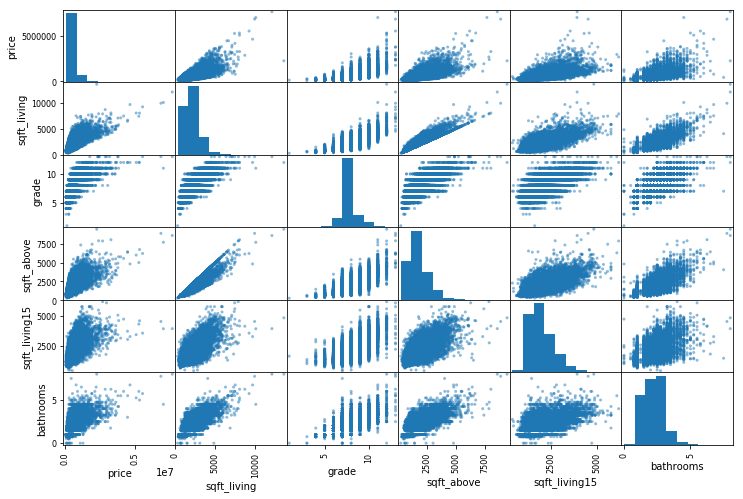

In [22]:
from pandas.tools.plotting import scatter_matrix

attributes = ["price", "sqft_living", "grade", "sqft_above","sqft_living15","bathrooms"]
scatter_matrix(kc_house_df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

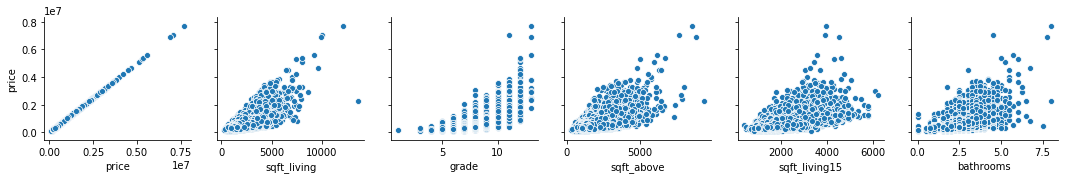

In [25]:
#We will just focus on a few promising variables, that seem the most correlated with the price.
pp = sns.pairplot(data=kc_house_df,
                  y_vars=['price'],
                  x_vars=attributes)
pp

# 3) Insights

1) sqft_living is the parameter that has good correlation as well as the pairplot also shows upward trend with less dispersion

2) View , Waterfront,Yr_Renovated has lot of zero values.

3) There is 5 strongly correlated values with Price: sqft_living 0.702035 grade 0.667434 sqft_above 0.605567 sqft_living15 0.585379 bathrooms 0.525138

4) Most Parameters like sqft_lot, year_renovated, have most of the values as 0, so they donot cover much of the variance in the dataset

# Q4 - Build a linear regression model to predict the house prices

In [27]:
#Buiding linear model with default feature set
X = kc_house_df.drop('price',axis=1)
y = kc_house_df.price

In [28]:
def ApplyLinAlg(X,y):
    validation_size = 0.20
    seed = 7
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,test_size=validation_size,random_state=seed)
    lms = LinearRegression()
    
    lms.fit(X_train,Y_train)
    mpredictions = lms.predict(X_validation)
    print('Coefficients: \n ', lms.coef_)
    print('MAE:', metrics.mean_absolute_error(Y_validation, mpredictions))
    print('MSE:', metrics.mean_squared_error(Y_validation, mpredictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_validation, mpredictions)))
    r_squared = metrics.r2_score(Y_validation,mpredictions)
    print('RSquare:',"-", r_squared)
    print('Reg Score',lms.score(X_validation,Y_validation) )
    fig, ax = plt.subplots()
    ax.scatter(Y_validation, mpredictions, edgecolors=(0, 0, 0))
    ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

Coefficients: 
  [ 3.11092306e+04 -3.29089824e+04  3.93842060e+04  1.10189860e+02
  8.06205909e-02  8.60436855e+03  6.04530457e+05  4.83723081e+04
  3.29958127e+04  9.57757511e+04  6.77601060e+01  4.24297543e+01
 -2.46560908e+03  2.66288827e+01  5.64481343e+05 -1.16465598e+05
  3.11261382e+01 -3.67037593e-01]
MAE: 128041.14681450055
MSE: 42238906822.26253
RMSE: 205521.0617485773
RSquare: - 0.6804090312106377
Reg Score 0.6804090312106377


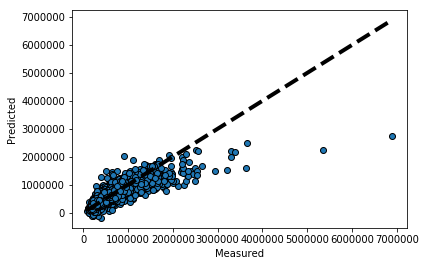

(None, (21613, 18))

In [29]:

ApplyLinAlg(X,y) , X.shape

In [ ]:
# Scores are low with all the features. Lets try to use just the correlated features to see if the scores are improving

# 4) Try to find out important features or create new features to improve the performance for your model.

In [30]:
#cost per sqft is an important parameter that incorporates the size vs cost. So lets add cost_per_sqft
kc_house_df['cost_per_sqft'] = kc_house_df['price']/kc_house_df['sqft_living'] 

In [31]:
kc_house_df.head(10)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014   221900.0         3       1.00         1180      5650     1.0   
1  2014   538000.0         3       2.25         2570      7242     2.0   
2  2015   180000.0         2       1.00          770     10000     1.0   
3  2014   604000.0         4       3.00         1960      5000     1.0   
4  2015   510000.0         3       2.00         1680      8080     1.0   
5  2014  1225000.0         4       4.50         5420    101930     1.0   
6  2014   257500.0         3       2.25         1715      6819     2.0   
7  2015   291850.0         3       1.50         1060      9711     1.0   
8  2015   229500.0         3       1.00         1780      7470     1.0   
9  2015   323000.0         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   
5           0     0          3     11        3890           1530      2001   
6           0     0          3      7        1715              0      1995   
7           0     0          3      7        1060              0      1963   
8           0     0          3      7        1050            730      1960   
9           0     0          3      7        1890              0      2003   

   yr_renovated      lat     long  sqft_living15  sqft_lot15  cost_per_sqft  
0             0  47.5112 -122.257           1340        5650     188.050847  
1          1991  47.7210 -122.319           1690        7639     209.338521  
2             0  47.7379 -122.233           2720        8062     233.766234  
3             0  47.5208 -122.393           1360        5000     308.163265  
4             0  47.6168 -122.045           1800        7503     303.571429  
5             0  47.6561 -122.005           4760      101930     226.014760  
6             0  47.3097 -122.327           2238        6819     150.145773  
7             0  47.4095 -122.315           1650        9711     275.330189  
8             0  47.5123 -122.337           1780        8113     128.932584  
9             0  47.3684 -122.031           2390        7570     170.899471

In [33]:
corr_matrix = kc_house_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
cost_per_sqft    0.554703
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003576
Name: price, dtype: float64

cost_per_sqft is also having a medium correlation with price.

But more importantly, we can use this to separate low priced houses with high priced ones.

In [34]:
#adding another column called group_price
#find out the mean of the cost_per_sqft
kc_house_df['cost_per_sqft'].describe()


count    21613.000000
mean       264.156594
std        110.060793
min         87.588235
25%        182.291667
50%        244.644550
75%        318.322981
max        810.138889
Name: cost_per_sqft, dtype: float64

In [35]:
#top 50% constitute values below 245 so splitting the group_prices based on price = 245
#0 indicates low rate and 1 indicates high price
def get_group(x):
    if x>245:
        return 1
    else:
        return 0
kc_house_df['group_prices'] = kc_house_df.cost_per_sqft.apply(get_group)

In [36]:
kc_house_df.head(10)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014   221900.0         3       1.00         1180      5650     1.0   
1  2014   538000.0         3       2.25         2570      7242     2.0   
2  2015   180000.0         2       1.00          770     10000     1.0   
3  2014   604000.0         4       3.00         1960      5000     1.0   
4  2015   510000.0         3       2.00         1680      8080     1.0   
5  2014  1225000.0         4       4.50         5420    101930     1.0   
6  2014   257500.0         3       2.25         1715      6819     2.0   
7  2015   291850.0         3       1.50         1060      9711     1.0   
8  2015   229500.0         3       1.00         1780      7470     1.0   
9  2015   323000.0         3       2.50         1890      6560     2.0   

   waterfront  view  condition      ...       sqft_above  sqft_basement  \
0           0     0          3      ...             1180              0   
1           0     0          3      ...             2170            400   
2           0     0          3      ...              770              0   
3           0     0          5      ...             1050            910   
4           0     0          3      ...             1680              0   
5           0     0          3      ...             3890           1530   
6           0     0          3      ...             1715              0   
7           0     0          3      ...             1060              0   
8           0     0          3      ...             1050            730   
9           0     0          3      ...             1890              0   

   yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  \
0      1955             0  47.5112 -122.257           1340        5650   
1      1951          1991  47.7210 -122.319           1690        7639   
2      1933             0  47.7379 -122.233           2720        8062   
3      1965             0  47.5208 -122.393           1360        5000   
4      1987             0  47.6168 -122.045           1800        7503   
5      2001             0  47.6561 -122.005           4760      101930   
6      1995             0  47.3097 -122.327           2238        6819   
7      1963             0  47.4095 -122.315           1650        9711   
8      1960             0  47.5123 -122.337           1780        8113   
9      2003             0  47.3684 -122.031           2390        7570   

   cost_per_sqft  group_prices  
0     188.050847             0  
1     209.338521             0  
2     233.766234             0  
3     308.163265             1  
4     303.571429             1  
5     226.014760             0  
6     150.145773             0  
7     275.330189             1  
8     128.932584             0  
9     170.899471             0  

[10 rows x 21 columns]

In [37]:
#Going by the correlation we can drop last few columns and those are : sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,sqft_lot15,yr_built,condition,long,date   
drop_columns = ['sqft_basement','bedrooms','lat','waterfront','floors','yr_renovated','sqft_lot','sqft_lot15','yr_built','condition','long','date']             
kc_house_df.drop(drop_columns,axis=1,inplace=True)

In [38]:
kc_house_df.head()

price  bathrooms  sqft_living  view  grade  sqft_above  sqft_living15  \
0  221900.0       1.00         1180     0      7        1180           1340   
1  538000.0       2.25         2570     0      7        2170           1690   
2  180000.0       1.00          770     0      6         770           2720   
3  604000.0       3.00         1960     0      7        1050           1360   
4  510000.0       2.00         1680     0      8        1680           1800   

   cost_per_sqft  group_prices  
0     188.050847             0  
1     209.338521             0  
2     233.766234             0  
3     308.163265             1  
4     303.571429             1

In [39]:
X = kc_house_df.drop('price',axis=1)
y = kc_house_df['price']

regressor = LinearRegression()

Our model was able to predict the value of every house in the test set within $129855.6 of the real price.


# 6) Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

In [40]:
seed=7
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=seed)

mse = []

results = model_selection.cross_val_score(regressor, X, y, cv=kfold, scoring="explained_variance")
mse = mse+[1-results.mean()]

print(results)
print(results.mean())
"MSE:{}".format(1-results.mean())

[0.86846443 0.86467451 0.88889039 0.86848055 0.86721105 0.89010348
 0.89743031 0.9018218  0.89087869 0.89914465]
0.8837099862356835


'MSE:0.11629001376431647'

The highest explained variance is 90%, so by k-fold we can get a mean of 88.37% r-squared.